<a href="https://colab.research.google.com/github/azizahlevia/ML/blob/main/UTS1_G_211_21_0020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Mengimport seluruh module yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

#import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Algoritma Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [10]:
# Membaca dataset dalam bentuk csv
cad = pd.read_csv('CADdataset.csv')
cad.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,N,N,...,N,N,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,Y,N,...,N,N,104,27,50,0,0,1.0,16,Normal


In [11]:
# cad.drop digunakan untuk membuang data yang tidak digunakan
cad.drop(['DLP','CAD'], axis = 1, inplace=True)
cad.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,BP,...,Tinversion,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN
0,53,90,175,Male,29.387755,0,1,1,Y,110,...,1,N,N,90,7,50,0,0,0.7,8
1,67,70,157,Fmale,28.398718,0,1,0,Y,140,...,1,N,N,80,26,40,4,0,1.0,30
2,54,54,164,Male,20.077335,0,0,1,N,100,...,0,N,N,85,10,40,2,0,1.0,17
3,66,67,158,Fmale,26.838648,0,1,0,Y,100,...,0,N,N,78,76,55,0,0,1.2,30
4,50,87,153,Fmale,37.165193,0,1,0,Y,110,...,0,N,N,104,27,50,0,0,1.0,16


In [12]:
# Memahami bentuk data dalam dataset
cad.shape

(303, 25)

In [13]:
# Merubah data nominal ke data numerik
cad = cad.replace({ 'Obesity': {'Y': 0, 'N': 1}})
cad = cad.replace({ 'WPE': {'Y': 0, 'N': 1}})
cad = cad.replace({ 'Atypical': {'Y': 0, 'N': 1}})
cad = cad.replace({ 'Nonanginal': {'Y': 0, 'N': 1}})
cad = cad.replace({ 'LVH': {'Y': 0, 'N': 1}})
cad = cad.replace({ 'PRP': {'Y': 0, 'N': 1}})

In [14]:
# Memahami data dan atribut dalam dataset cad
cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 303 non-null    int64  
 1   Weight              303 non-null    int64  
 2   Height              303 non-null    int64  
 3   Sex                 303 non-null    object 
 4   BMI                 303 non-null    float64
 5   DM                  303 non-null    int64  
 6   HTN                 303 non-null    int64  
 7   Current Smoker      303 non-null    int64  
 8   Obesity             303 non-null    int64  
 9   BP                  303 non-null    int64  
 10  WPE                 303 non-null    int64  
 11  Typical Chest Pain  303 non-null    int64  
 12  Atypical            303 non-null    int64  
 13  Nonanginal          303 non-null    int64  
 14  St Depression       303 non-null    int64  
 15  Tinversion          303 non-null    int64  
 16  LVH     

In [15]:
#Mengecek Null
cad.isnull().sum()

Age                   0
Weight                0
Height                0
Sex                   0
BMI                   0
DM                    0
HTN                   0
Current Smoker        0
Obesity               0
BP                    0
WPE                   0
Typical Chest Pain    0
Atypical              0
Nonanginal            0
St Depression         0
Tinversion            0
LVH                   0
PRP                   0
FBS                   0
ESR                   0
EF                    0
 RWMA                 0
EX-Smoker             0
CR                    0
BUN                   0
dtype: int64

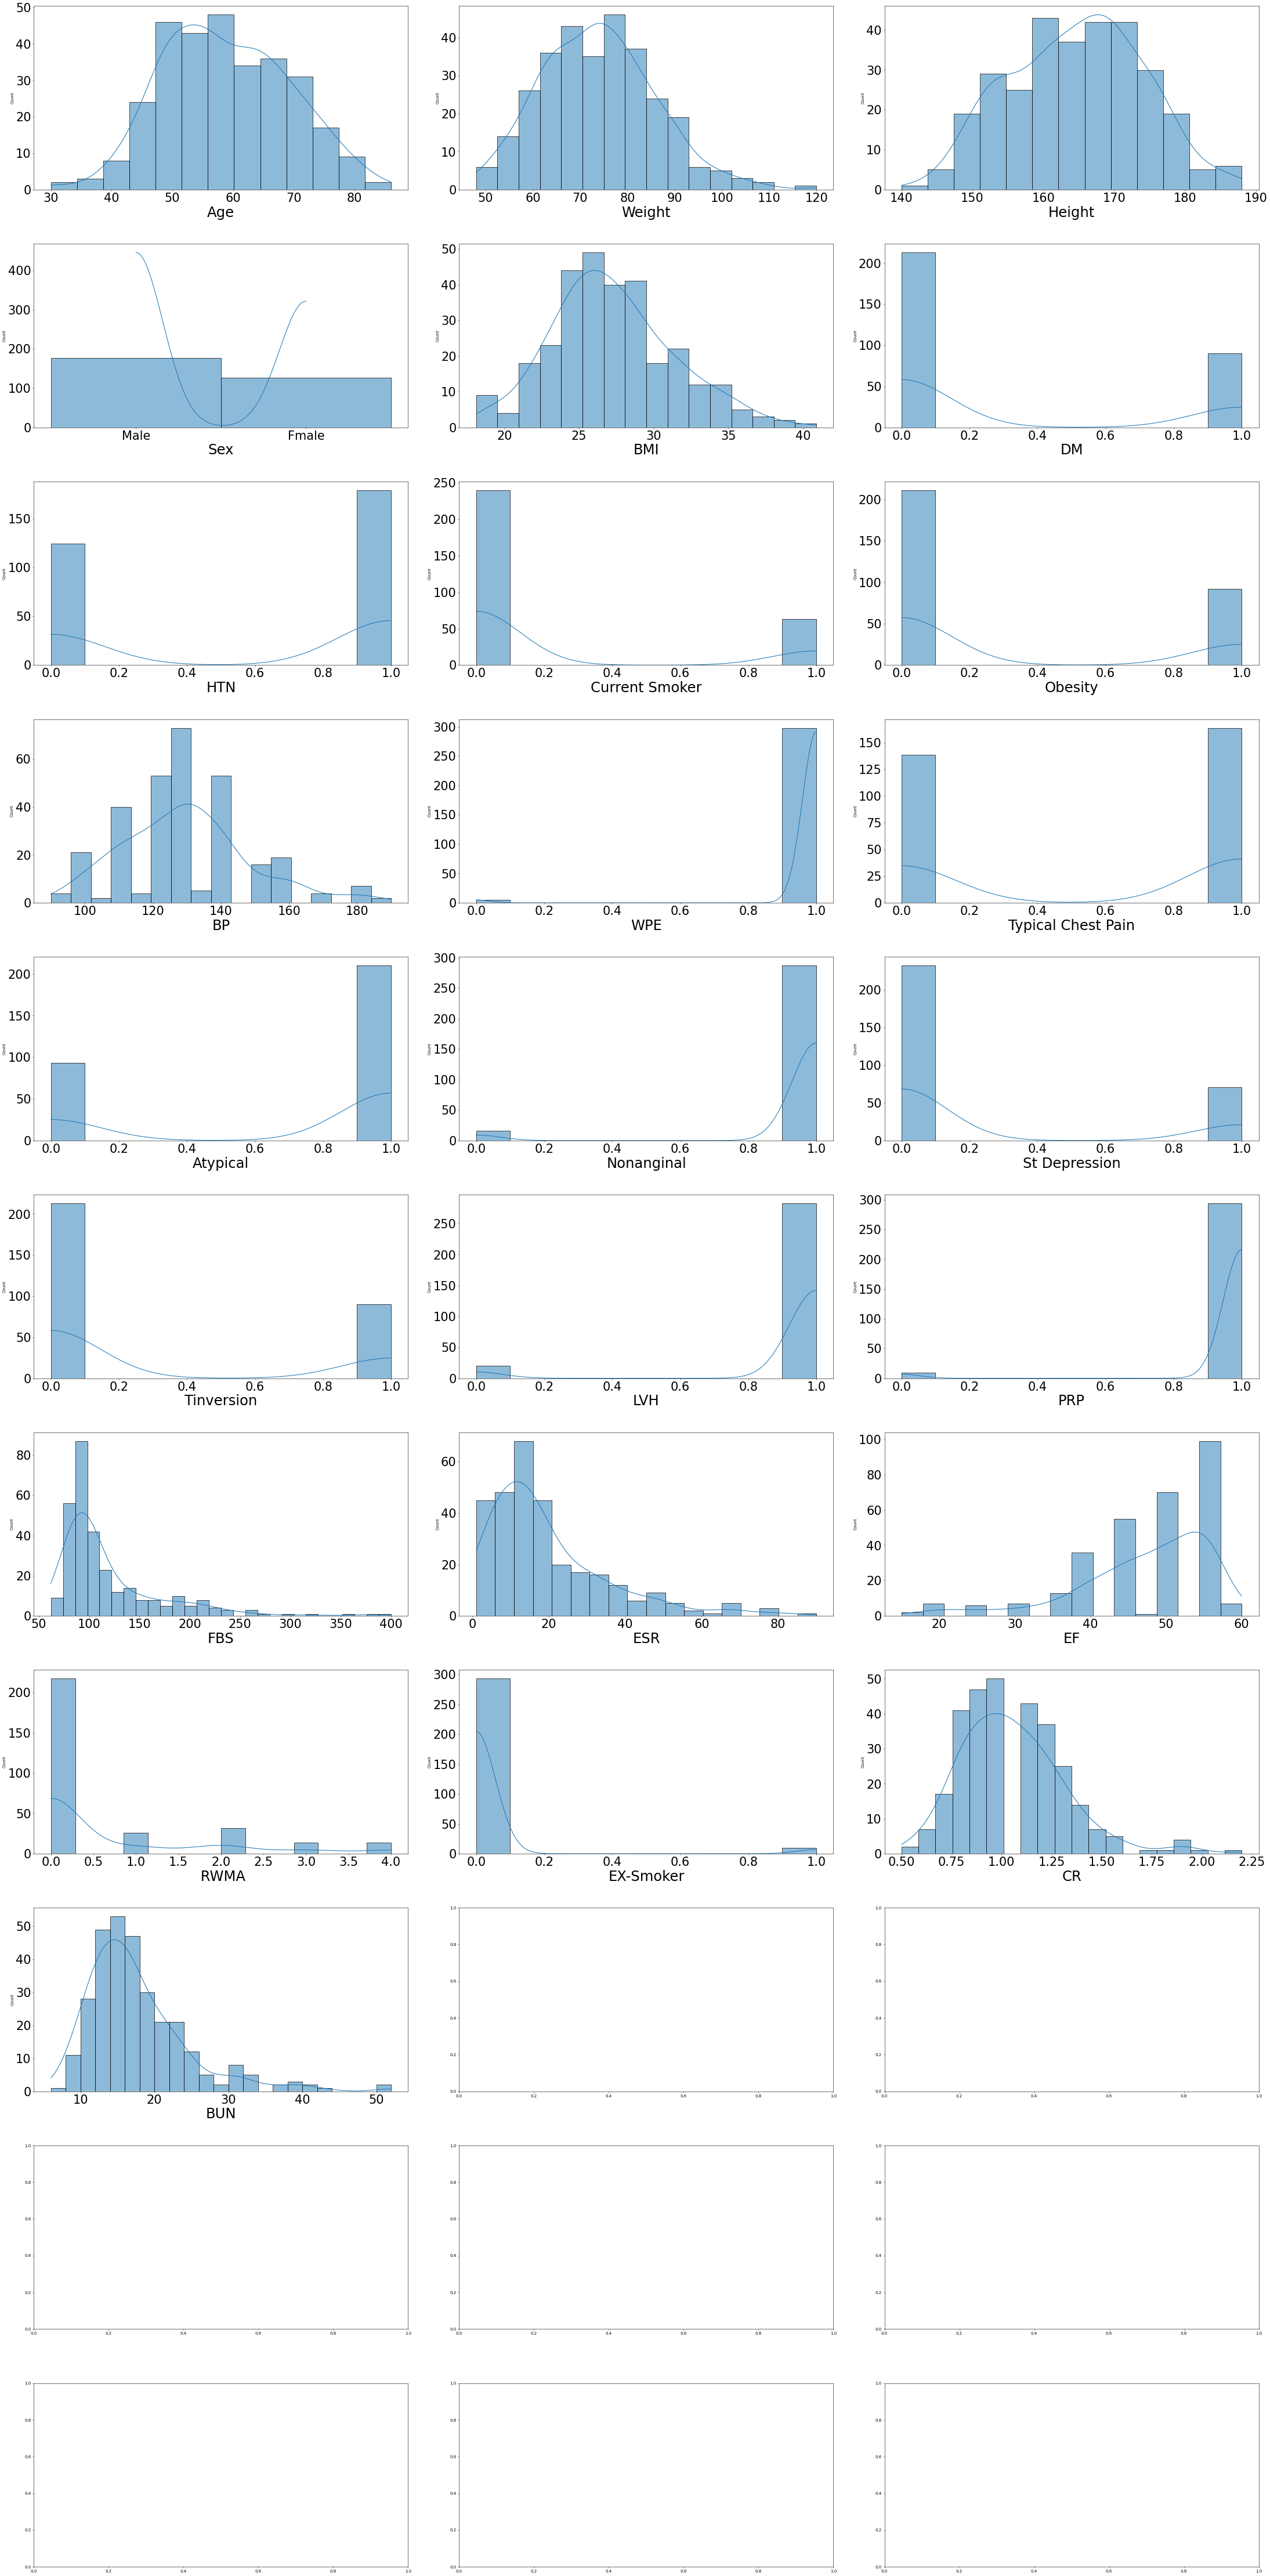

In [16]:
fig, axs = plt.subplots(ncols = 3, nrows = 11, figsize = (45,90), dpi = 50)
axs = axs.flatten()
for i, col in enumerate(cad):
  sns.histplot(x = col, data = cad, kde = True, ax = axs[i])
  axs[i].set_xlabel(col,fontsize = 35)
  axs[i].tick_params(axis = 'x', labelsize = 30)
  axs[i].tick_params(axis = 'y', labelsize = 30)

plt.tight_layout(pad =5.0)
plt.show()

In [17]:
# atribut biasa
x = cad.drop(columns='Sex')
x.head()

,Age,Weight,Height,BMI,DM,HTN,Current Smoker,Obesity,BP,WPE,...,Tinversion,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN
0,53,90,175,29.387755,0,1,1,0,110,1,...,1,1,1,90,7,50,0,0,0.7,8
1,67,70,157,28.398718,0,1,0,0,140,1,...,1,1,1,80,26,40,4,0,1.0,30
2,54,54,164,20.077335,0,0,1,1,100,1,...,0,1,1,85,10,40,2,0,1.0,17
3,66,67,158,26.838648,0,1,0,0,100,1,...,0,1,1,78,76,55,0,0,1.2,30
4,50,87,153,37.165193,0,1,0,0,110,1,...,0,1,1,104,27,50,0,0,1.0,16


In [18]:
# Atribut spesial
y = cad['Sex']
y.head()

0     Male
1    Fmale
2     Male
3    Fmale
4    Fmale
Name: Sex, dtype: object

In [19]:
# Split data menjadi data training (70%) dan data testing (30%)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [20]:
# Naive Bayes
nb = GaussianNB()

# Training
nb.fit(xtrain, ytrain)

GaussianNB()

In [21]:
#Klasifikasi dengan algoritma Naive Bayes
ypred = nb.predict(xtest)

In [22]:
# akurasi Naive Bayes
print(accuracy_score(ytest,ypred))

0.7032967032967034


In [23]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

       Fmale       0.57      0.91      0.70        35
        Male       0.91      0.57      0.70        56

    accuracy                           0.70        91
   macro avg       0.74      0.74      0.70        91
weighted avg       0.78      0.70      0.70        91

